### Problem Statement
Diabetes is one of the most frequent diseases worldwide and the number of diabetic patients is growing over the years. The main cause of diabetes remains unknown, yet scientists believe that both genetic factors and environmental lifestyle play a major role in diabetes.

Individuals with diabetes face a risk of developing some secondary health issues such as heart diseases and nerve damage. Thus, early detection and treatment of diabetes can prevent complications and assist in reducing the risk of severe health problems. Even though it's incurable, it can be managed by treatment and medication.

Researchers at the Bio-Solutions lab want to get a better understanding of this disease among women and are planning to use machine learning models that will help them to identify patients who are at risk of diabetes.

You as a data scientist at Bio-Solutions have to build a classification model using a dataset collected by the "National Institute of Diabetes and Digestive and Kidney Diseases" consisting of several attributes that would help to identify whether a person is at risk of diabetes or not.

### Objective:
To build a model to predict whether an individual is at risk of diabetes or not.

### Data Description:
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skinfold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- Pedigree: Diabetes pedigree function - A function that scores likelihood of diabetes based on family history.
- Age: Age in years
- Class: Class variable (0: the person is not diabetic or 1: the person is diabetic)

In [32]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, f1_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [34]:
data = pd.read_csv('pima-indians-diabetes.csv')
df = data.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [35]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Class          768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [37]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [38]:
df.duplicated().sum()

0

df.isnull().sum()

In [39]:
df.shape

(768, 9)

### Missing value treatment

In [40]:
df.loc[df.Glucose ==0, 'Glucose'] = df.Glucose.median()
df.loc[df.BloodPressure ==0, 'BloodPressure'] = df.BloodPressure.median()
df.loc[df.SkinThickness == 0, 'SkinThickness'] = df.SkinThickness.median()
df.loc[df.Insulin == 0, 'Insulin'] = df.Insulin.median()
df.loc[df.BMI == 0, 'BMI'] = df.BMI.median()

### Split Data

In [41]:
X = df.drop(['Class'], axis=1)
y = df['Class']

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=1, stratify=y)

## Model evaluation criterion
#### The model can make wrong predictions as:
1. Predicting a person doesn't have diabetes and the person has diabetes.
2. Predicting a person has diabetes, and the person doesn't have diabetes.
#### Which case is more important?
Predicting a person doesn't have diabetes, and the person has diabetes.
#### Which metric to optimize?
We would want Recall to be maximized, the greater the Recall higher the chances of minimizing false negatives because if a model predicts that a person is at risk of diabetes and in reality, that person doesn't have diabetes then that person can go through further levels of testing to confirm whether the person is actually at risk of diabetes but if we predict that a person is not at risk of diabetes but the person is at risk of diabetes then that person will go undiagnosed and this would lead to further health problems.

In [43]:
# defining the function to compute different metrics to check the performace of classification model using sklearn

def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute performance of model using different metrics
    model: classifier
    predictors: independent varibles
    target: dependent variables
    """
    
    pred = model.predict(predictors)
    acc = accuracy_score(target, pred)
    recall = recall_score(target, pred)
    precision = precision_score(target, pred)
    f1 = f1_score(target, pred)
    
    df_perf = pd.DataFrame(
        {
        'Accuracy': acc,
        'Precision': precision,
        'Recall': recall,
        'F1': f1
        },
        index=[0],
    )
    
    return df_perf
    

In [44]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot confusion matrix with percentage
    model: classifier
    predictors: independent variables
    target: dependent variables
    """
    
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target,y_pred)
    labels = np.asarray([["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()]).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Decision Tree

Training Performance:
     Accuracy  Precision  Recall   F1
0       1.0        1.0     1.0  1.0
Testing Performance:
     Accuracy  Precision    Recall        F1
0  0.731602   0.626667  0.580247  0.602564


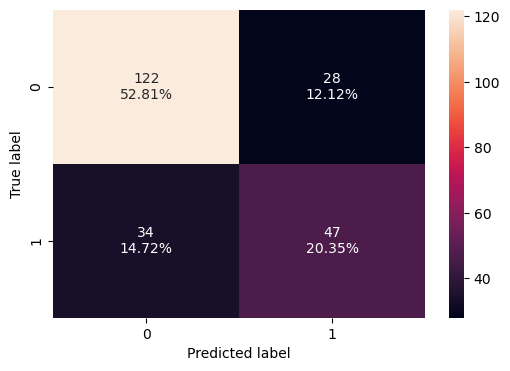

In [45]:
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train, y_train)


# calculating different metrics
dtree_model_train_perf = model_performance_classification_sklearn(d_tree, X_train, y_train)
print("Training Performance:\n ",dtree_model_train_perf)

dtree_model_test_perf = model_performance_classification_sklearn(d_tree, X_test,y_test)
print("Testing Performance:\n ", dtree_model_test_perf)

confusion_matrix_sklearn(d_tree, X_test, y_test)

### Random Forest

Training Performance: 
    Accuracy  Precision  Recall   F1
0       1.0        1.0     1.0  1.0
Testing Performance: 
    Accuracy  Precision   Recall        F1
0  0.753247     0.6875  0.54321  0.606897


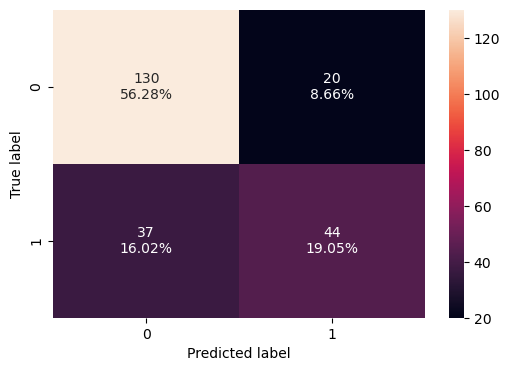

In [46]:
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train, y_train)

rf_estimator_model_perf_train = model_performance_classification_sklearn(rf_estimator, X_train,y_train)
rf_estimator_model_perf_test = model_performance_classification_sklearn(rf_estimator, X_test, y_test)

print("Training Performance: \n",rf_estimator_model_perf_train)
print("Testing Performance: \n", rf_estimator_model_perf_test)

confusion_matrix_sklearn(rf_estimator, X_test, y_test)

### Bagging Classifier

Training Performance: 
    Accuracy  Precision    Recall        F1
0  0.994413        1.0  0.983957  0.991914
Testing Performance: 
    Accuracy  Precision    Recall        F1
0  0.744589   0.661765  0.555556  0.604027


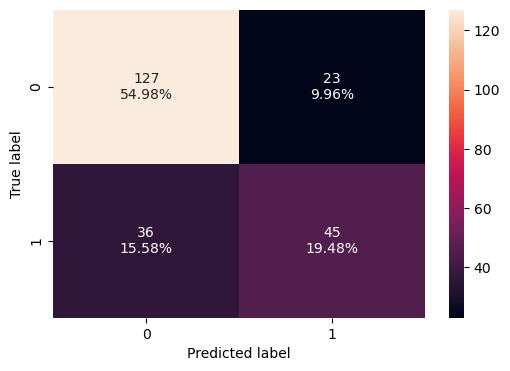

In [47]:
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

bagging_classifier_model_train_perf = model_performance_classification_sklearn(bagging_classifier, X_train, y_train)
bagging_classifier_model_test_perf = model_performance_classification_sklearn(bagging_classifier , X_test, y_test)

print("Training Performance: \n", bagging_classifier_model_train_perf)
print("Testing Performance: \n", bagging_classifier_model_test_perf)

confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

### Tuning Decision Tree

In [48]:
dtree_estimator = DecisionTreeClassifier(class_weight={1:0.65,0:0.35}, random_state=1)
parameters = {
    'max_depth': np.arange(2,10),
    'min_samples_leaf': [5,7,10,15],
    'max_leaf_nodes': [2,3,5,10,15],
    'min_impurity_decrease': [0.0001, 0.001, 0.01, 0.1]
}

scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(dtree_estimator, parameters, scoring= scorer, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

dtree_estimator = grid_obj.best_estimator_

dtree_estimator.fit(X_train, y_train)


DecisionTreeClassifier(class_weight={0: 0.35, 1: 0.65}, max_depth=4,
                       max_leaf_nodes=5, min_impurity_decrease=0.0001,
                       min_samples_leaf=5, random_state=1)

Training Performance: 
    Accuracy  Precision    Recall        F1
0  0.759777   0.613281  0.839572  0.708804
Testing Performance: 
    Accuracy  Precision    Recall        F1
0  0.692641   0.544643  0.753086  0.632124


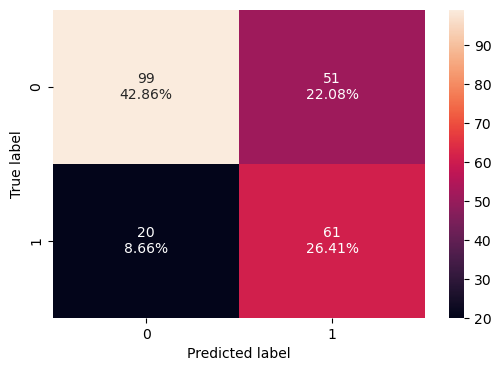

In [49]:
dtree_estimator_model_perf_train = model_performance_classification_sklearn(dtree_estimator, X_train, y_train)
dtree_estimator_model_perf_test = model_performance_classification_sklearn(dtree_estimator,X_test,y_test)

print("Training Performance: \n",dtree_estimator_model_perf_train)
print("Testing Performance: \n", dtree_estimator_model_perf_test)

confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

### Tuning Random Forest

In [ ]:
rf_tuned = RandomForestClassifier(class_weight={0:0.35,1:0.65}, random_state=1)

parameters = {
    "max_depth": list(np.arange(3,10,1)),
    "max_features": np.arange(0.6,1.1,0.1),
    "max_samples": np.arange(0.7,1.1,0.1),
    "min_samples_split": np.arange(2,20,5),
    "n_estimators": np.arange(30,160,20),
    "min_impurity_decrease": [0.0001,0.001,0.01,0.1]
}

scorer= metrics.make_scorer(metrics.recall_score)
grid_obj = GridSearchCV(rf_tuned,parameters, cv=5, n_jobs=-1,scoring=scorer )

grid_obj.fit(X_train, y_train)

rf_tuned = grid_obj.best_estimator_
rf_tuned.fit(X_train, y_train)

In [ ]:
rf_tuned_model_perf_train = model_performance_classification_sklearn(rf_tuned, X_train, y_train)
rf_tuned_model_perf_test = model_performance_classification_sklearn(rf_tuned, X_test, y_test)

print("Training Performance: \n", rf_tuned_model_perf_train)
print("Testing Performance: \n", rf_tuned_model_perf_test)

confusion_matrix_sklearn(rf_tuned, X_test, y_test)

### Tuning Bagging Classifier

In [ ]:
bagging_estimator_tuned = BaggingClassifier(random_state=1, class_weight={0:0.35,1:0.65})
parameters = {
    "max_samples": [0.7,0.8,0.9,1],
    "max_features": [0.7,0.8,0.9,1],
    "n_estimators": [10,20,30,40,50]
}

scorer = metrics.make_scorer(metrics.recall_scorer)

grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, cv=5, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

bagging_estimator_tuned = grid_obj.best_estimator_

bagging_estimator_tuned.fit(X_train, y_train)

In [ ]:
bagging_estimator_tuned_model_perf_train = model_performance_classification_sklearn(bagging_estimator_tuned, X_train, y_train)
bagging_estimator_tuned_model_perf_test = model_performance_classification_sklearn(bagging_estimator_tuned, X_test, y_test)

print("Training Performance: \n", bagging_estimator_tuned_model_perf_train)
print("Testing Performance: \n", bagging_estimator_tuned_model_perf_test)

confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

### Comparing all the models

In [ ]:
model_train_com_df = pd.concat([dtree_model_train_perf.T,dtree_estimator_model_perf_train.T, rf_estimator_model_perf_train.T, rf_tuned_model_perf_train.T, bagging_classifier_model_train_perf.T, bagging_estimator_tuned_model_perf_train.T], axis=1)
model_train_com_df.columns= ["Decision Tree", "Decision Tree Estimator", "Random Forest", "Tuned Random Forest", "Bagging Classifier", "Tuned Bagging Estimator"]
print("Comparison of all Models on training dataset")
model_train_com_df

In [ ]:
model_test_com_df = pd.concat([dtree_model_test_perf.T, dtree_estimator_model_perf_test.T, rf_estimator_model_perf_test.T,rf_tuned_model_perf_test.T,bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_perf_test.T], axis=1)
model_test_com_df.columns = ["Decision Tree", "Decision Tree Estimator", "Random Forest", "Tuned Random Forest", "Bagging Classifier","Tuned Bagging Classifier"]

print("Comparison of all Models on testing dataset")
model_test_com_df


### Feature importance of tuned decision tree

In [ ]:
feature_names = list(X_train.columns)
print(tree.export_text(dtree_estimator, feature_names = feature_names, show_weights =True))

In [ ]:
feature_names = list(X_train.columns)
importances = dtree_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title("Feature Importance")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)),[feature_names[i] for i in indices])
plt.xlabel("Relative importance")
plt.show()